Problem Statement 1:

Network: 1 input layer, no hidden layer and 1 output layer

1.1
1D Data:
the function, y=2 is used to generate the data set. Further, a gaussian noise with variation of 0.2 is used to add noise for target points, that is y=2x + noise.
Network: 1 neuron in each; input layer and output layer
Activation Function Used: No Activation Function Used
Loss function: Regression Loss

1.2
Multidimensional Data:
Considered: 3 features of x; x1, x2 and x3
Using seed(), function used is:
y=0.4*x1 + 0.4*x2 + 0.4*x3 + .... + 0.4*xp + 1 is the function used to generate the dataset.
Network: Here p neurons in input layer, no hidden layer and 1 neuron in output layer
For the underneath example, 2 input neurons were used.
Activation Function Used: No Activation Function Used
Loss function: Regression Loss

Number of input neurons => number of features in input layer
Training data arrays;
trainmulx - array of p features [[x11, x12, x13, ... , x1p)], [x21, x22, x23, ... , x2p], ...]
trainmuly - array of corresponding y values [[y1], [y2], ... ,[yp]]

In [1]:
import numpy as np
import pandas as pd
import random
from random import seed
from random import random
from math import exp
import matplotlib.pyplot as plt
import math
from past.builtins import xrange
global p

In [2]:
#taining data - number of samples generated = 20
#Linear function used - y=2x+gaussion variable
training_inputs=[]
xy=[]
samples=20
def make1ddatatrain(samples):
    seed(1)
    training_inputs=[]
    gaus=0.2
    for i in range(0,samples):
        x=np.random.uniform(0,1, 1)
        Y=np.empty((samples,1))
        t=np.empty((samples,1))
        Y=f(x)
        noise=np.random.randn(x.shape[0]) * gaus
        t=Y+noise
        xy=[x,t] 
        training_inputs.append(xy)
        plt.plot(x, t, 'bo', label='t')
        plot1=plt.plot(x, t, 'bo', label='t')
    plt.plot([0,1], [f(0),f(1)], 'b-', label='f(x)')
    
    plt.title('inputs (x) vs targets (t) for train data')
    plt.xlabel("Input")
    plt.ylabel("Actual Line")
    plt.show()
    return training_inputs

def f(x):
    return 2*x

In [3]:
#Forming 1D testing data - number of samples generated = 20
testing_inputs=[]
xy=[]
def make1ddatatest(samples):
    seed(1)
    testing_inputs=[]
    gaus=0.2
    for i in range(0,samples):
        x=np.random.uniform(0,1,1)
        Y=np.empty((samples,1))
        t=np.empty((samples,1))
        Y=f1(x)
        noise=np.random.randn(x.shape[0]) * gaus
        t=Y+noise
        xy=[x,t] 
        testing_inputs.append(xy)
        plt.plot(x, t, 'bo', label='t')
    plt.plot([0,1], [f(0),f(1)], 'b-', label='f(x)')
    plt.title('inputs (x) vs targets (t) for test data')
    plt.xlabel("Input")
    plt.ylabel("Actual Line")
    plt.show()
    return testing_inputs

def f1(x):
    return 2*x

Enter number of input neurons wanted if multidimensional data is choosen.

In [4]:
#Forming multidimensional training data - number of samples generated = 20
p=int(input("Enter number of input neurons."))
trainmul_inputs=[]
bet=[]
for i in range(p):
    n=float("{0:.1f}".format(np.random.uniform(0, 1)))
    bet=np.append(bet,n) #multidimensional function used -> y=0.4*x1 + 0.4*x2 + 1
    print("bet",bet)
def makedatatrain(no_in_neurons, samples):
    seed(1)
    for i in range(samples):
        x=np.random.uniform(0, 1, (samples,no_in_neurons))
        Y=np.empty([samples,1])
        Y=np.dot(x,bet)
        Y=Y+1
        xy=[x[i],Y[i]]
        trainmul_inputs.append(xy)
    return trainmul_inputs
makedatatrain(2,10)

Enter number of input neurons.1
bet [0.3]


ValueError: shapes (10,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [5]:
#Forming multidimensional testing data - number of samples generated = 20
testmul_inputs=[]
print("bet",bet)
def makedatatest(no_in_neurons, samples):
    seed(1)
    for i in range(samples):
        xt=np.random.uniform(0, 1, (samples,no_in_neurons))
        Yt=np.empty([samples,1])
        Yt=np.dot(xt,bet)
        Yt=Yt+7
        xy=[xt[i],Yt[i]]
        testmul_inputs.append(xy)
    return testmul_inputs
makedatatest(2,10)

bet [0.3]


ValueError: shapes (10,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [6]:
#defining Network Class
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        features=sizes[:-1]
        #Randomly generate weights and biases arrays.
        #let i=input neuron, h=hidden neuron, o=output neuron, l=layer number(1-input, h1-first hidden layer ... hl-last hidden layer, l+1-output layer), wlij=weights from jth neuron in layer l to ith neuron in layer l-1 
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        print("Weights")
        print(self.weights)
        print("Biases")
        print(self.biases)

    def callbackprop(self, training, batch_size, epochs, eta, testing):
        losserr=[]
        n_test = len(testing)
        n = len(training)
        for j in xrange(epochs):
            alldata = [training]
            for i in alldata:
                #nabla_b and nabla_w are new empty matrices of same dimensions as biases and weights matrices
                nabla_b = [np.zeros(b.shape) for b in self.biases]
                nabla_w = [np.zeros(w.shape) for w in self.weights]
                #taking each training sample and backpropagating to get dC/db and dC/dw in delta_nabla_b and delta_nabla_w respectively.
                for x, y in i:
                    delta_nabla_b, delta_nabla_w = self.backprop(x, y)
                    #add each of the change of biases and weights to the changed biases(nabla_b) and weights(nabla_w) matrices to get final changed biases and weights matrices respectively
                    nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
                    nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
                    #updating network with the new weights and biases recieved from each training sample
                self.weights = [w-(eta)*nw for w, nw in zip(self.weights, nabla_w)]
                self.biases = [b-(eta)*nb for b, nb in zip(self.biases, nabla_b)]      
            print("Epoch {0}: {1} / {2}".format(j, self.evaluate(testing), n_test))
        if(p==1):
            # plot the fitted line
            print("Fitted Line")
            for i in alldata:
                for x,y in i:
                    a=np.array(x)
                    #print("a",a)
                    fittedy=np.dot(a,self.weights)+self.biases
                plt.plot([0, 1], [-fittedy,-a], 'r-', label='fitted line')
                plt.title("Fitted line")
                plt.xlabel("Input")
                plt.ylabel("Predicted Line")
            plt.show()
            
    def backprop(self, x, y):
        #Returns a tuple (nabla_b, nabla_w) = gradient of cost function, C
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        #feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            lastz=z
            zs.append(z)
            activation = (z)
            activations.append(activation)
        #backward pass
        delta = self.cost_derivative(activations[-1], y)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, zs[-1].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            delta = np.dot(self.weights[-l+1].transpose(), delta) * z
            nabla_b[-l] = delta
            print("p",p)
            if(p>1):
                if(l==self.num_layers-1):
                    arr=activations[1]
                    arr.reshape((1,1))
                    activations[-l-1]=arr
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def cost_derivative(self, output_activation, y):
        #Returns dC/da
        return (output_activation-y)
    
    def evaluate(self, traindata):
       #Evaluates the loss for test_data=[test_datax, test_datay]; loss=1/2*((test_datay-lossoftestdatax)^2)
        error=0
        for x,y in traindata:
            ff=self.feedforward(x)
            test_results = [(ff, y) for (x, y) in traindata]
        for i in range(len(traindata)):
            error=error+(((test_results[i][1]-test_results[i][0])**2)/2)
            lasterr=error
        lasterr=lasterr[0][0]
        losserr.append(lasterr)
        #Plotting the loss funtion over all the epochs.
        plt.plot(losserr)
        plt.show()
        return error
    
    def feedforward(self,a):
        #Output of network if a is input
        for b, w in zip(self.biases, self.weights):
            a=np.dot(w, a)+b
        return a

Underneath is the main function which is used to choose between 1D data and multidimensional data.
Choose 1 for 1D data and 2 for multidimensional data.

Also, as run earlier, above chosen value for number of input neurons is used as p.

Enter 1 for 1D data or 2 for multidimensional data1


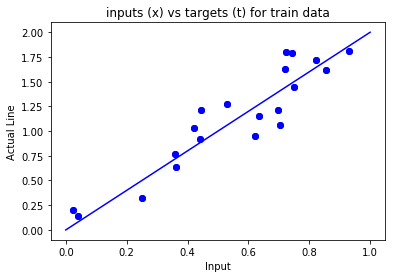

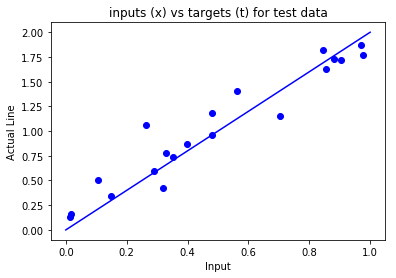

Number of neurons in 1st layer=1 and in 2nd layer=1
Weights
[array([[0.65391777]])]
Biases
[array([[1.70314775]])]


In [7]:
option = int(input("Enter 1 for 1D data or 2 for multidimensional data"))
if option == 1:
    losserr=[]
    training_inputs=[]
    xy=[]
    testing_inputs=[]
    training = make1ddatatrain(samples) # Make 1D train dataset having p input neurons
    testing = make1ddatatest(samples) # Make 1D test dataset having p input neurons
    print("Number of neurons in 1st layer=1 and in 2nd layer=1")
    net=Network([1,1])  #1 input layer having 1 neuron and 1 output layer having 1 neuron
    epochs=20
    eta=0.003
    #Set hyperparameters for 1D dataset


else:
    losserr=[]
    testmul_inputs=[]
    testmul_inputs=[]
    xy=[]
    training = makedatatrain(p, samples) # Make multidimensional train dataset having p input neurons
    testing = makedatatest(p, samples) # Make multidimensional test dataset having p input neurons
    print("Number of neurons in 1st layer=p and in 2nd layer=1")
    #Set hyperparameters for multidimensional dataset
    samples=20
    epochs=60
    eta=0.0003
    net=Network([p,1])  #1 input layer having p neurons and 1 output layer having 1 neuron

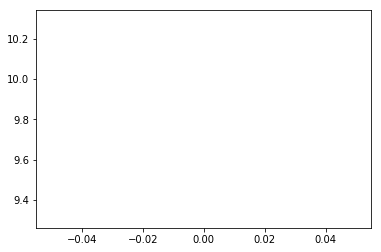

Epoch 0: [[9.80135471]] / 20


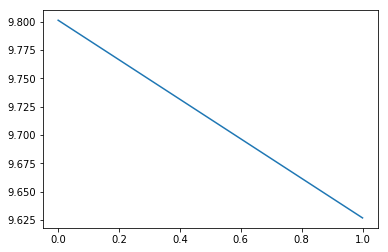

Epoch 1: [[9.6268368]] / 20


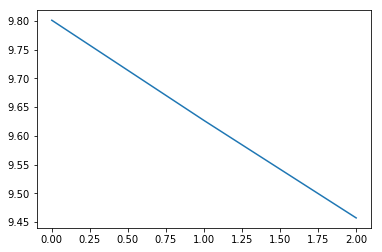

Epoch 2: [[9.45710628]] / 20


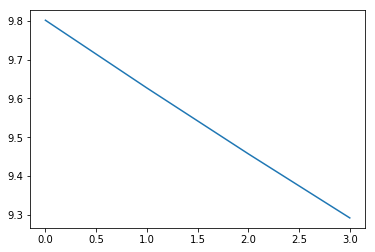

Epoch 3: [[9.29201248]] / 20


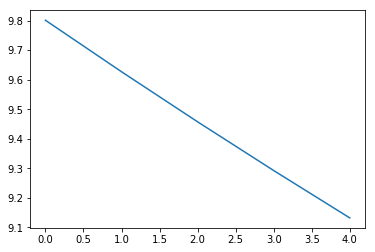

Epoch 4: [[9.13141023]] / 20


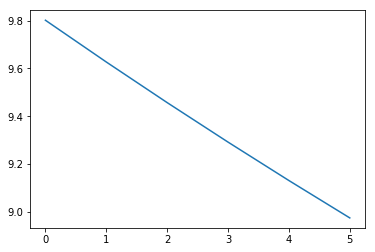

Epoch 5: [[8.97515962]] / 20


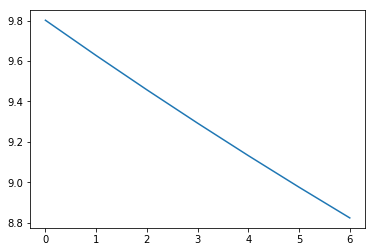

Epoch 6: [[8.82312577]] / 20


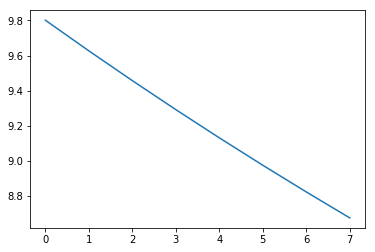

Epoch 7: [[8.67517864]] / 20


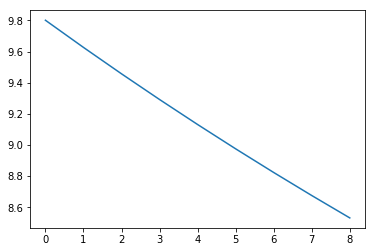

Epoch 8: [[8.53119282]] / 20


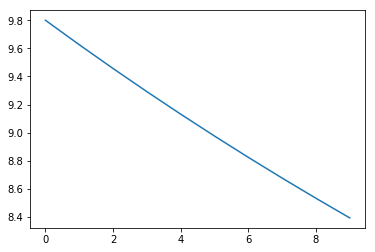

Epoch 9: [[8.39104734]] / 20


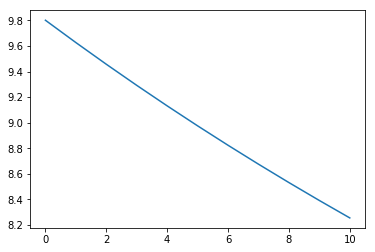

Epoch 10: [[8.25462548]] / 20


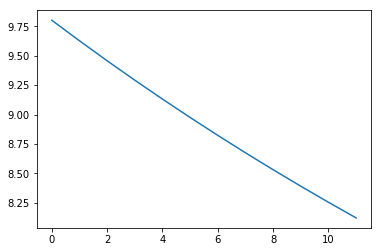

Epoch 11: [[8.1218146]] / 20


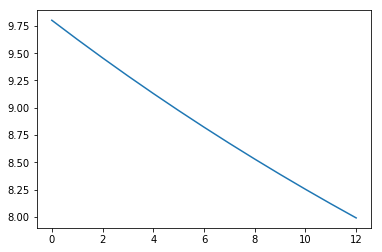

Epoch 12: [[7.99250601]] / 20


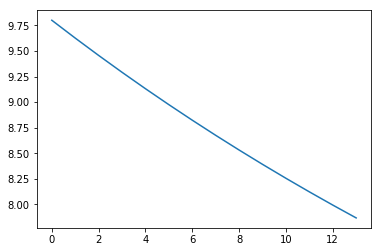

Epoch 13: [[7.86659477]] / 20


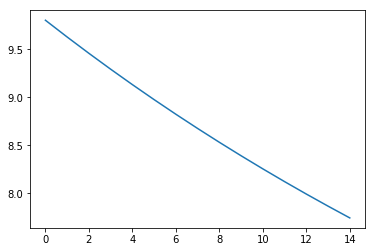

Epoch 14: [[7.74397953]] / 20


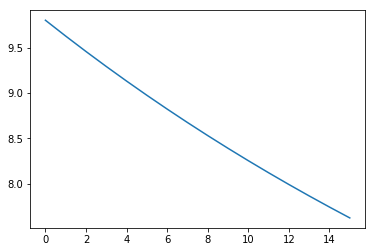

Epoch 15: [[7.62456245]] / 20


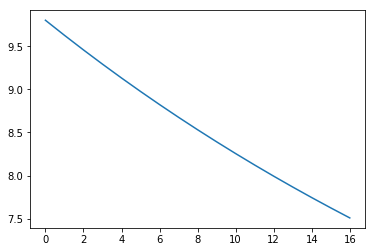

Epoch 16: [[7.50824901]] / 20


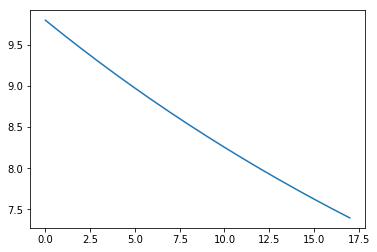

Epoch 17: [[7.39494788]] / 20


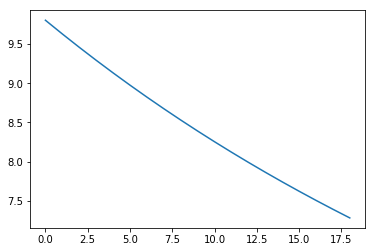

Epoch 18: [[7.28457082]] / 20


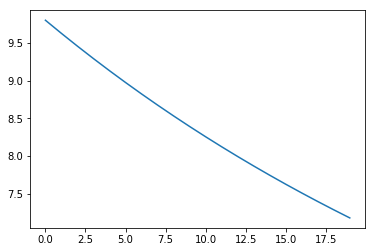

Epoch 19: [[7.17703255]] / 20
Fitted Line


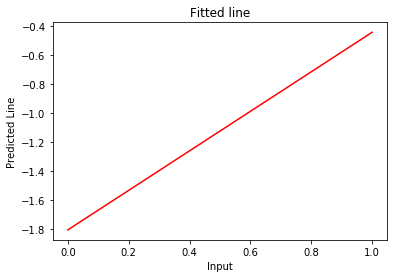

In [8]:
# Calling backpropagation to train the network
net.callbackprop(training,samples,epochs,0.0003,training)

Plot for Loss after training dataset


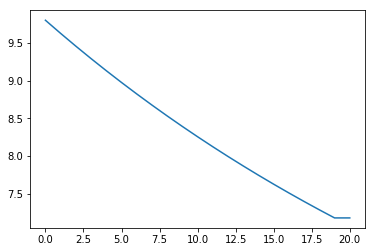

[[7.17703255]]


In [9]:
# Call evaluate function to check the loss on train dataset "after" change of weights and biases
print("Plot for Loss after training dataset")
losstrainafter=net.evaluate(training)
print(losstrainafter)

Plot for Loss on testing dataset


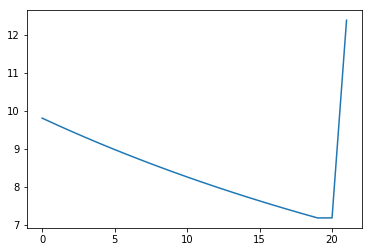

Loss on test data [[12.37680637]]


In [10]:
#Prints plot of change of loss on testing
print("Plot for Loss on testing dataset")
losstrainafter=net.evaluate(testing)
print("Loss on test data",losstrainafter)

Training data for 1D dataset


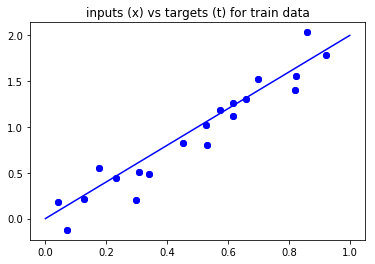

In [11]:
from IPython.display import Image
print("Training data for 1D dataset")
Image(filename='1.1train.png')

Testing data for 1D dataset


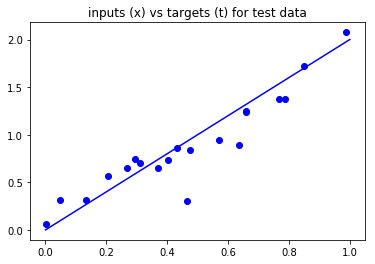

In [12]:
print("Testing data for 1D dataset")
Image(filename='1.1test.png')

Training data Loss Plot of 1D data with hyperparameters of samples=20, epochs=20, eta=0.003
Loss at the end of training: 3.39355212


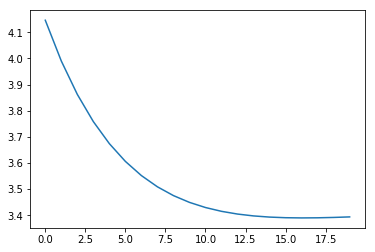

In [13]:
print("Training data Loss Plot of 1D data with hyperparameters of samples=20, epochs=20, eta=0.003")
print("Loss at the end of training: 3.39355212")
Image(filename='1.1.LossTrain1D.png')

Fitted Line after Training
Loss at the end of training: 3.39355212


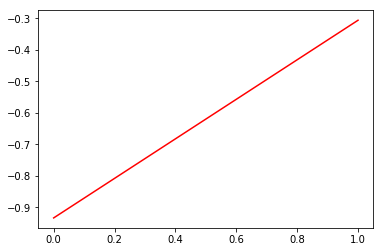

In [14]:
print("Fitted Line after Training")
print("Loss at the end of training: 3.39355212")
Image(filename='1.1fittedline.png')

Testing data Loss Plot of 1D data with hyperparameters of samples=20, epochs=20, eta=0.003
Loss at the end of training: 2.39939447


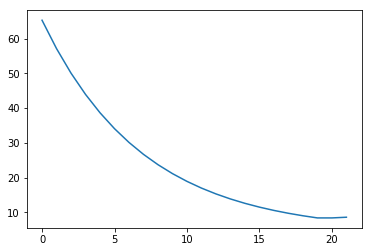

In [15]:
print("Testing data Loss Plot of 1D data with hyperparameters of samples=20, epochs=20, eta=0.003")
print("Loss at the end of training: 2.39939447")
Image(filename='1.1.LossTest1D.png')

Training data Loss Plot of 1D data with further training and hyperparameters of samples=20, epochs=60, eta=0.00001


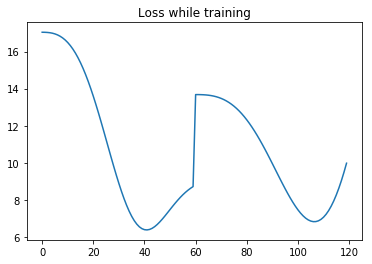

In [16]:
print("Training data Loss Plot of 1D data with further training and hyperparameters of samples=20, epochs=60, eta=0.00001")
Image(filename='1.12ndtest.png')

Training data Loss Plot of Multidimensional data with hyperparameters of samples=, epochs=, eta=
Loss at the end of training: 43


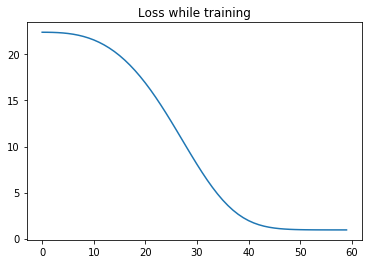

In [17]:
print("Training data Loss Plot of Multidimensional data with hyperparameters of samples=, epochs=, eta=")
print("Loss at the end of training: 43")
Image(filename='1.2train1.png')

Training data Loss Plot of Multidimensional data with hyperparameters of samples=, epochs=, eta=
Loss at the end of training: 0.9


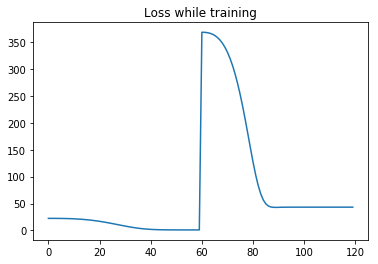

In [18]:
print("Training data Loss Plot of Multidimensional data with hyperparameters of samples=, epochs=, eta=")
print("Loss at the end of training: 0.9")
Image(filename='1.2test1.png')

By the loss function plot on the training and test data, we can see that the loss is decreasing and hence, the model is trained.

1.1 1D data-
The convergence to low loss is extremely slow; at the learning rate of 0.003. The initial loss before training is coming out to be very high in a few data sets like 150.00+, giving an intuition that learning rate could be made a little higher, like 0.01/0.1 but in stead of convergence of loss we see divergence, hence loss needs to be reduced extremely slowly, keeping eta very small.
Even after a very minimal eta of 0.003 the convergence and loss falls down to only 3.399 on the train data. 

The use of this on test data, shows loss convergence to 2.399.

1.2 Multidimensional data-
When training with the same hyperparameters of samples=20, epochs=60 and eta=0.00001, the training loss recieved is very less, that of 0.9 which may give us the intuition that the training is performed well, but when we check for a test dataset, we see that overfitting has occured as the loss is 43.24.
It is shown in the diagrams below.

Observations:

Questions:
1.c
The setting of hyperparameters is difficult as we don't know the following things:
1. How the trend of loss for given number of training samples and number of epochs is changing.
2. The learning rate is also unknown. But, as we have a small data, the learning rate is mostly small so we don't get a jump in the gradients as much.
Considering the increase or decrease of loss, the learning rate can be decided. Higher the learning rate, faster the convergence or divergence of error. It could go in both the directions, so there was a need to change the learning rate while training multiple times.

But, mostly the observations are:
1.21 When loss changes very slowly, the learning rate is very small but increase of eta is mostly diverging than converging.
1.22 When loss changes rapidly, the learning rate needs to be kept in mind and thoughtfully look into, to avoid increase of loss immediately in upcoming eopchs because then again, changes to the learning rate would be needed to reduce the epoch.

References

1. Micheal Neilsen Neural Networks and Deep Learning (2017). Online Blog. Chapter 1

2. Micheal Neilsen Neural Networks and Deep Learning (2017). Online Blog. Chapter 2


Citations:
1. http://neuralnetworksanddeeplearning.com/chap2.html

